Name: Tushar Muley

Assignment: Week 9-10 Exercises 5.2

Date:November 07, 20121

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# update settings

pd.set_option('display.max_columns', None)

In [3]:
# load data

# first file
file1 = 'costcos-geocoded.xlsx'
costco = pd.read_excel(file1)

In [4]:
costco.columns

Index(['Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude'], dtype='object')

In [4]:
# load data

# first file
file1 = 'ppg2008.xlsx'
bball = pd.read_excel(file1)

In [5]:
#load data

df = pd.read_csv('Foreign_Exchange_Rates.csv', 
                 usecols=[1,7], names=['DATE', 'CAD_USD'], 
                 skiprows=1, index_col=0, parse_dates=[0])

# Heat Map

In [22]:

df['CAD_USD'] = pd.to_numeric(df.CAD_USD, errors='coerce')
df.dropna(inplace=True)

In [23]:
# create a copy of the dataframe, and add columns for month and year

df_m = df.copy()
df_m['month'] = [i.month for i in df_m.index]
df_m['year'] = [i.year for i in df_m.index]
# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).mean()

In [24]:
df_m = df_m.unstack(level=0)

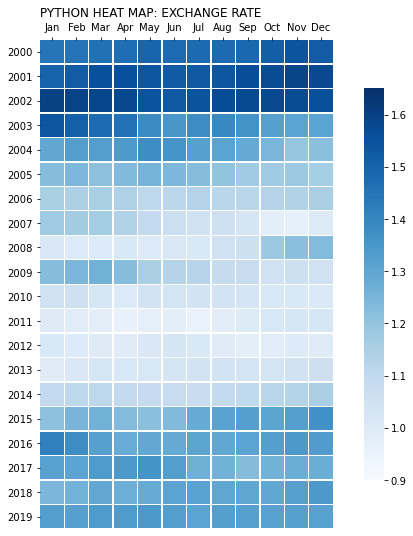

In [26]:
# figure

fig, ax = plt.subplots(figsize=(11, 9))

# plot heatmap
sns.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65, square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)

# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'Python Heat Map: Exchange Rate'.upper()
plt.title(title, loc='left')
plt.show()

# Contour Chart

In [27]:
# function to define the data

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [28]:
# build the grid

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

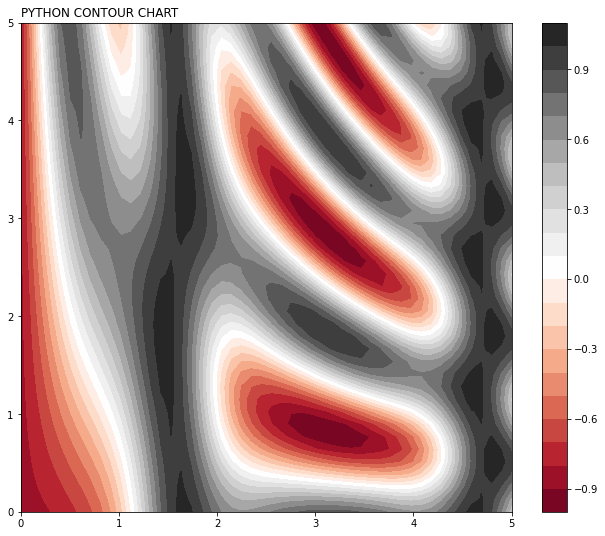

In [31]:
# plot
fig, ax = plt.subplots(figsize=(11, 9))
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

# title
title = 'Python Contour Chart'.upper()
plt.title(title, loc='left')
plt.show()

# Spatial Chart

In [5]:
import folium

In [6]:
m=folium.Map(location=[28.644800, 77.216721])
m

In [7]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [8]:
m1=folium.Map(width=550,height=350,location=[28.644800, 77.216721],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(m1)
m1

In [10]:
costco.head

<bound method NDFrame.head of                        Address        City       State    Zip Code   Latitude  \
0     1205 N. Memorial Parkway  Huntsville     Alabama  35801-5930  34.743095   
1         3650 Galleria Circle      Hoover     Alabama  35244-2346  33.377649   
2       8251 Eastchase Parkway  Montgomery     Alabama       36117  32.363889   
3    5225 Commercial Boulevard      Juneau      Alaska  99801-7210  58.359200   
4         330 West Dimond Blvd   Anchorage      Alaska  99515-1950  61.143266   
..                         ...         ...         ...         ...        ...   
412            19610 SE 1st St   Vancouver  Washington       98607  45.621299   
413       10990 Harbor Hill Dr  Gig Harbor  Washington       98335  47.357748   
414     27520 Covington Way SE   Covington  Washington       98042  47.354838   
415            2150 Deming Way   Middleton   Wisconsin  53562-5507  43.100195   
416     950 Port Washington Rd     Grafton   Wisconsin  53024-9201  43.324691  

In [25]:
map = folium.Map(location=[costco.Latitude.mean(), costco.Longitude.mean()], 
                 zoom_start=4, control_scale=True)


In [26]:
for index, location_info in costco.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]]).add_to(map)

map